## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [2]:
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [4]:
female_row = dataset[dataset['Sex'] == 'female'] 
female_percentage = female_row['Survived'].value_counts(normalize=True).get(1) * 100
male_rows = dataset[dataset['Sex'] == 'male']
male_percentage = male_rows['Survived'].value_counts(normalize=True).get(1) * 100

gender_count = pd.DataFrame({
    'men': [male_percentage],
    'female': [female_percentage] 
})
print(gender_count)



         men     female
0  18.890815  74.203822


**Задача 2:** Відтворіть ці графіки  
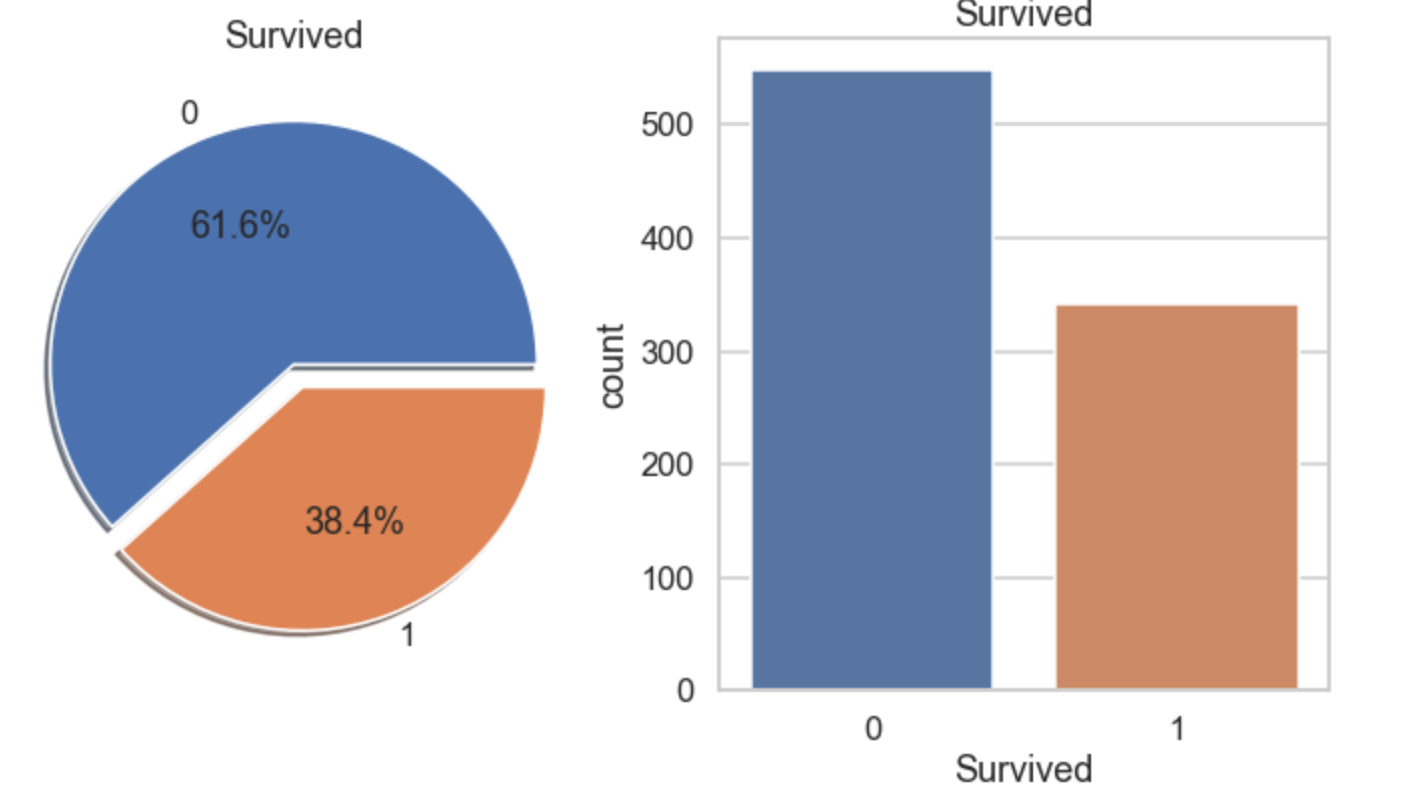


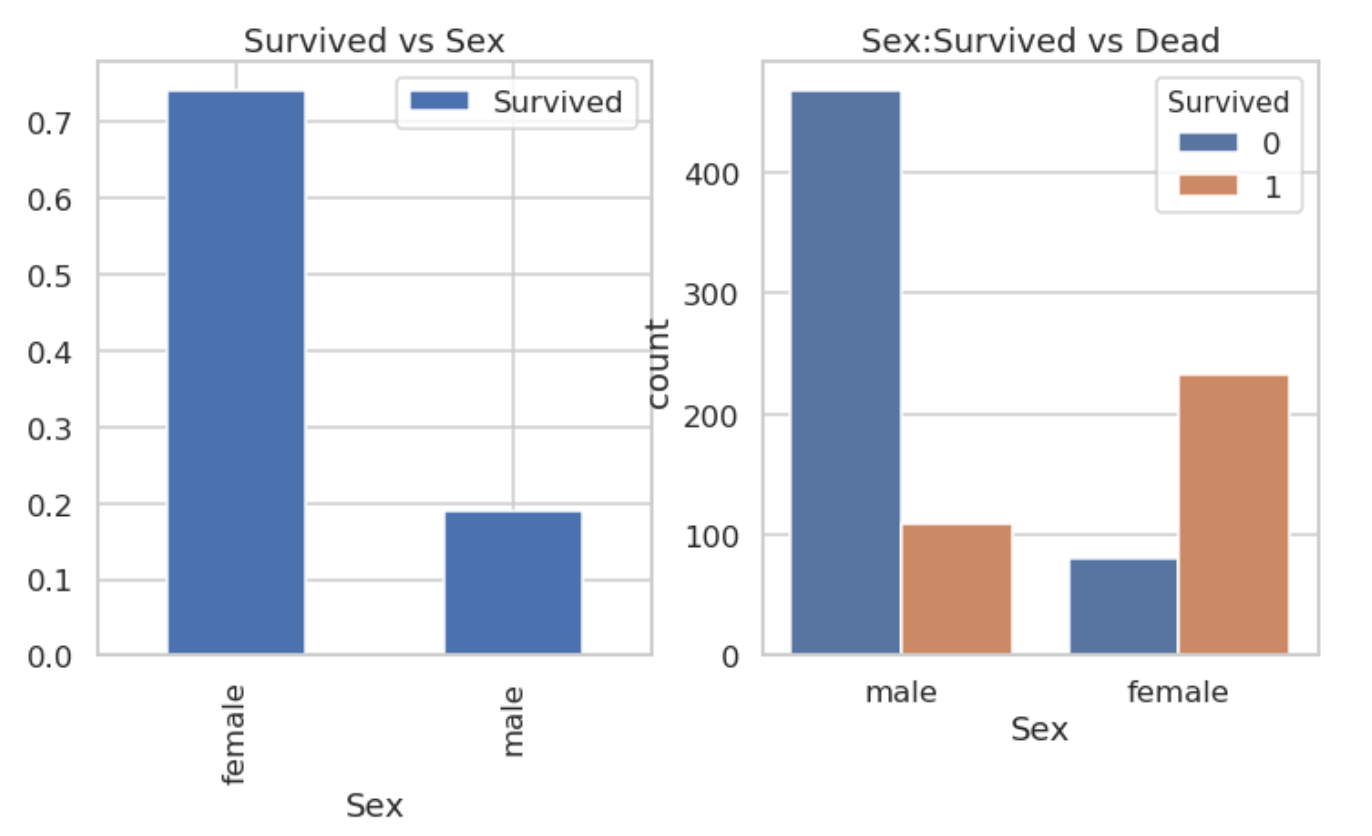

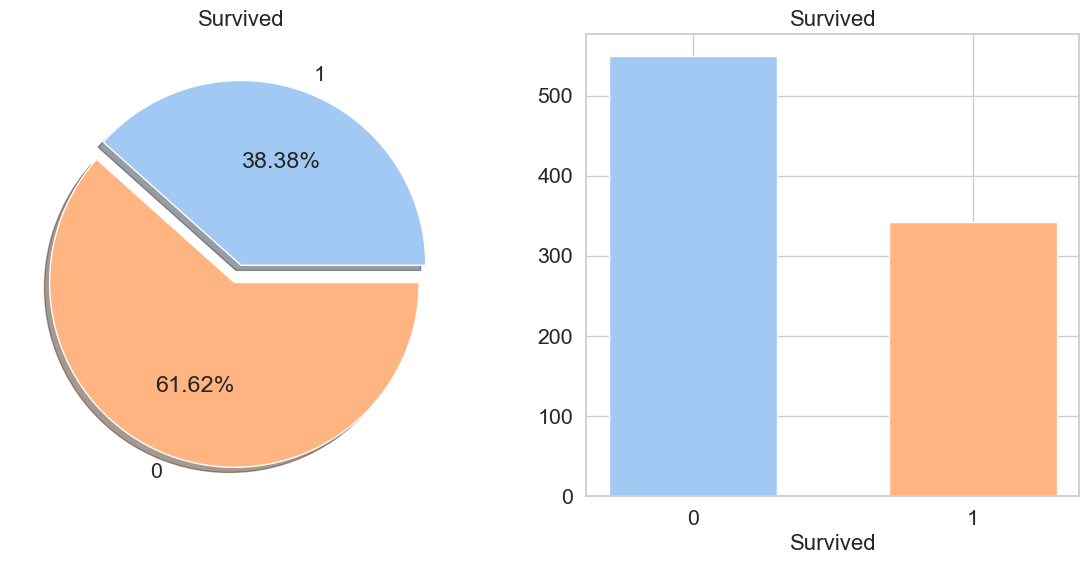

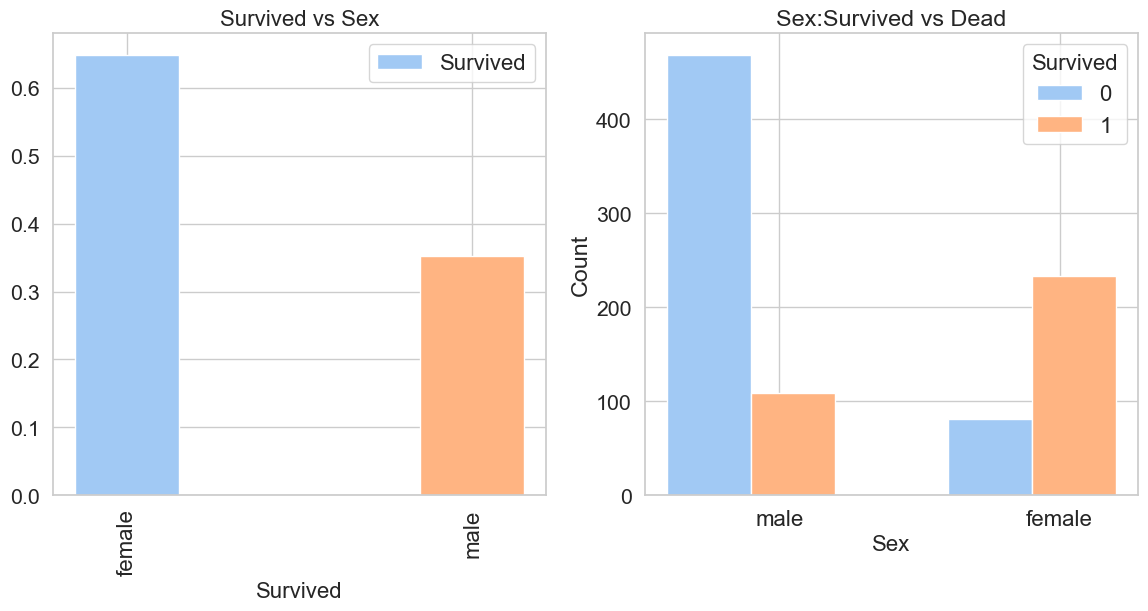

In [5]:
explode = [0, 0.1]
sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1.4)
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
survived_passengers = dataset[dataset['Survived'] == 1].shape[0]
dead_passengers = dataset[dataset['Survived'] == 0].shape[0]
axes[0].pie(x=[survived_passengers, dead_passengers], labels=[1,0], autopct='%0.2f%%', shadow=True, explode=explode, colors=sns.color_palette('pastel')) 
axes[0].set_title('Survived', fontsize=16)

axes[1].bar(x=['0', '1'], width=0.6, height=[dead_passengers, survived_passengers], color=sns.color_palette('pastel'))  
axes[1].set_title('Survived', fontsize=16)
axes[1].set_xlabel('Survived', fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
counter = dataset['Sex'].value_counts(normalize=True)
axes[0].bar(x=['female', 'male'], width=0.3, height=[counter.iloc[0], counter.iloc[1]], color=sns.color_palette('pastel'))  
axes[0].set_xticklabels(['female', 'male'], rotation=90, fontsize=16)
axes[0].legend(['Survived'], fontsize=16)
axes[0].set_title('Survived vs Sex', fontsize=16)
axes[0].set_xlabel('Survived', fontsize=16)

count_survived_female = female_row[female_row['Survived'] == 1].shape[0]
count_dead_f = female_row[female_row['Survived'] == 0].shape[0]
count_survived_male = male_rows[male_rows['Survived'] == 1].shape[0]
count_dead_m = male_rows[male_rows['Survived'] == 0].shape[0]

x_male = np.arange(2)
x_female = np.arange(2) + 0.3
axes[1].bar(x_male, height=[count_dead_m, count_dead_f], width=0.3, label='0', color=sns.color_palette('pastel')[0])  
axes[1].bar(x_female, [count_survived_male, count_survived_female], width=0.3, label='1', color=sns.color_palette('pastel')[1]) 
axes[1].set_ylabel('Count')
axes[1].set_xticks(np.arange(2) + 0.25)
axes[1].set_xticklabels(['male', 'female'], fontsize=16)
axes[1].set_ylabel('Count')
axes[1].set_title('Sex:Survived vs Dead')
axes[1].set_xlabel('Sex', fontsize=16)
axes[1].legend([0, 1], fontsize=16).set_title('Survived', prop={"size": 16})

plt.show()


На першому графіку зображено співвідношення в процентах загинувших пасажирів до виживших, де нуль означає загинувший, а один - виживший. На другому графіку зліва зображено два стовпці, які показують загинувших та виживших, але вже в кількості людей. На графіку, який знаходиться в другій лінійці зліва, відображено співвідношення виживших жінок та чоловіків в процентах. На графіку, який знаходиться в другій лінійці справа, розташовано по 2 стовпці для кожної статі, які показують кількість загинувших та виживших для кожної з статей.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [6]:
null_cels= dataset.isnull().sum()
null_cels

#code

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

// порахувати моду. або топ 3.зробити перше хлопців

In [18]:
import re
def only_name(full_name):
    match = re.search(r'\((.*?)\)', full_name)  
    if match:
        return match.group(1) 
    elif "." in full_name:
        return full_name.split(".")[1].split()[0]
    else:
        return full_name
female_row["Name"] = female_row["Name"].apply(only_name)
print(female_row['Name'].value_counts())



Name
Anna                        10
Mary                        10
Margaret                     6
Elizabeth                    5
Helen                        4
                            ..
Margaretta Corning Stone     1
Hilda                        1
Sylvia Mae Harbaugh          1
Ada E Hall                   1
Margaret Norton              1
Name: count, Length: 248, dtype: int64


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [8]:
def trim_name(full_name): return full_name.split(".")[1].split()[0] if "." in full_name else full_name
male_rows["Name"] = male_rows["Name"].apply(trim_name)
print(male_rows['Name'].value_counts())

Name
William    35
John       25
George     14
Charles    13
Thomas     13
           ..
Ignjac      1
Yoto        1
Austen      1
Mitto       1
Juozas      1
Name: count, Length: 287, dtype: int64


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
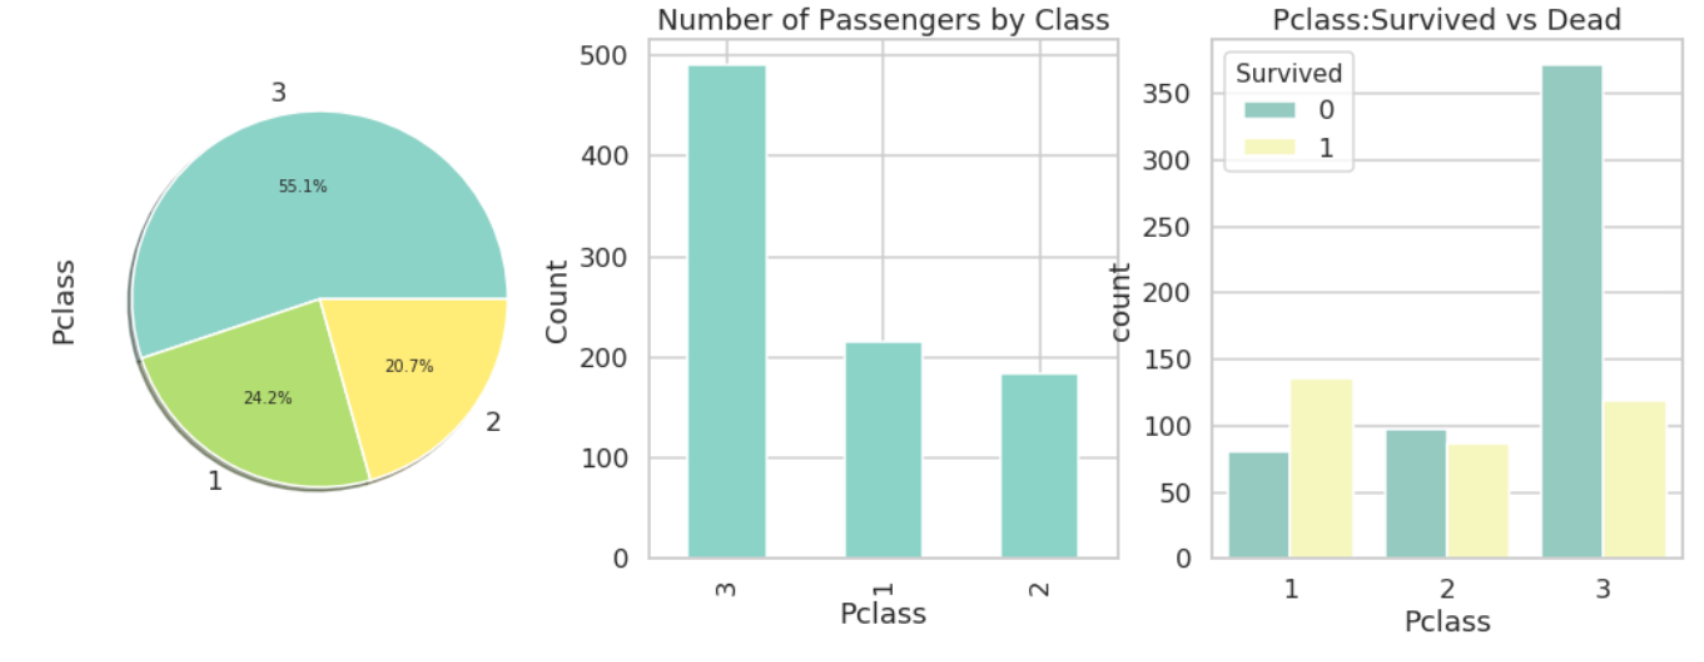

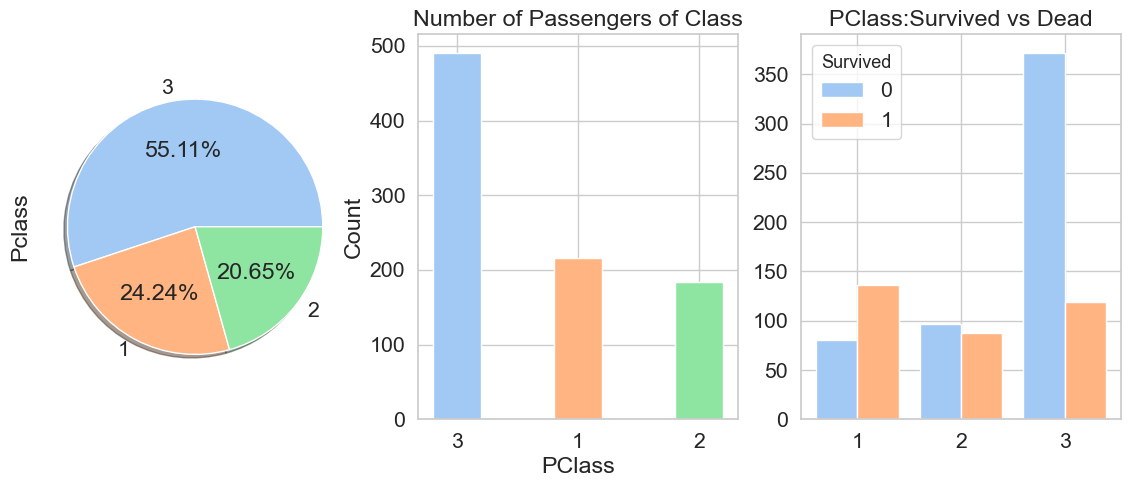

In [9]:
class_1 = dataset[dataset['Pclass'] == 1]
class_2 = dataset[dataset['Pclass'] == 2]
class_3 = dataset[dataset['Pclass'] == 3]
class_1_data = [class_1[class_1['Survived'] == 0], class_1[class_1['Survived'] == 1]]
class_2_data = [class_2[class_2['Survived'] == 0], class_2[class_2['Survived'] == 1]]
class_3_data = [class_3[class_3['Survived'] == 0], class_3[class_3['Survived'] == 1]]

colors=sns.color_palette('pastel')
fig, axes = plt.subplots(ncols=3, figsize=(14, 5))
x_ticks = np.arange(3)
sizes = [class_3.shape[0], class_1.shape[0], class_2.shape[0]]
axes[0].pie(x=sizes, labels=[3, 1, 2], autopct='%0.2f%%', shadow=True, colors=colors)  
axes[0].set_ylabel('Pclass')

axes[1].bar(x=['3', '1', '2'], height=sizes, width=0.4, color=colors) 
axes[1].set_ylabel('Count')
axes[1].set_xlabel('PClass')
axes[1].set_title('Number of Passengers of Class')

axes[2].bar(x_ticks, height=[class_1_data[0].shape[0], class_2_data[0].shape[0], class_3_data[0].shape[0]], width=0.4, label=0, color=colors[0])  
axes[2].bar(x_ticks + 0.4, height=[class_1_data[1].shape[0], class_2_data[1].shape[0], class_3_data[1].shape[0]], width=0.4, label=1, color=colors[1])  
axes[2].set_xticks(x_ticks + 0.2)
axes[2].set_xticklabels(['1', '2', '3'])
axes[2].set_title('PClass:Survived vs Dead')
axes[2].legend([0, 1], loc='upper left').set_title('Survived', prop={"size": 13})
plt.show()

Прокоментуйте побудовані графіки\
На даних діаграмах показано співвідношення виживших пасажирів та класів, в яких вони були, де 0 означає загинув, а 1 - вижив. \
На діаграмі, розташованій зліва, можна побачити відсоткове співвідношення кожного класу квитків на кораблі та зрозуміти, що найбільше було квитків 3 класу.\
На графіку, який розташований посередині, можна побачити, скільки людей придбали квитків з кожного класу. \
Діаграма, розташована зправа, показує кількість загинувших та виживших для кожного класу. По даній діаграмі можна зрозуміти, що найбільше загинуло людей 3 класу та вижило найбільше 1 класу.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
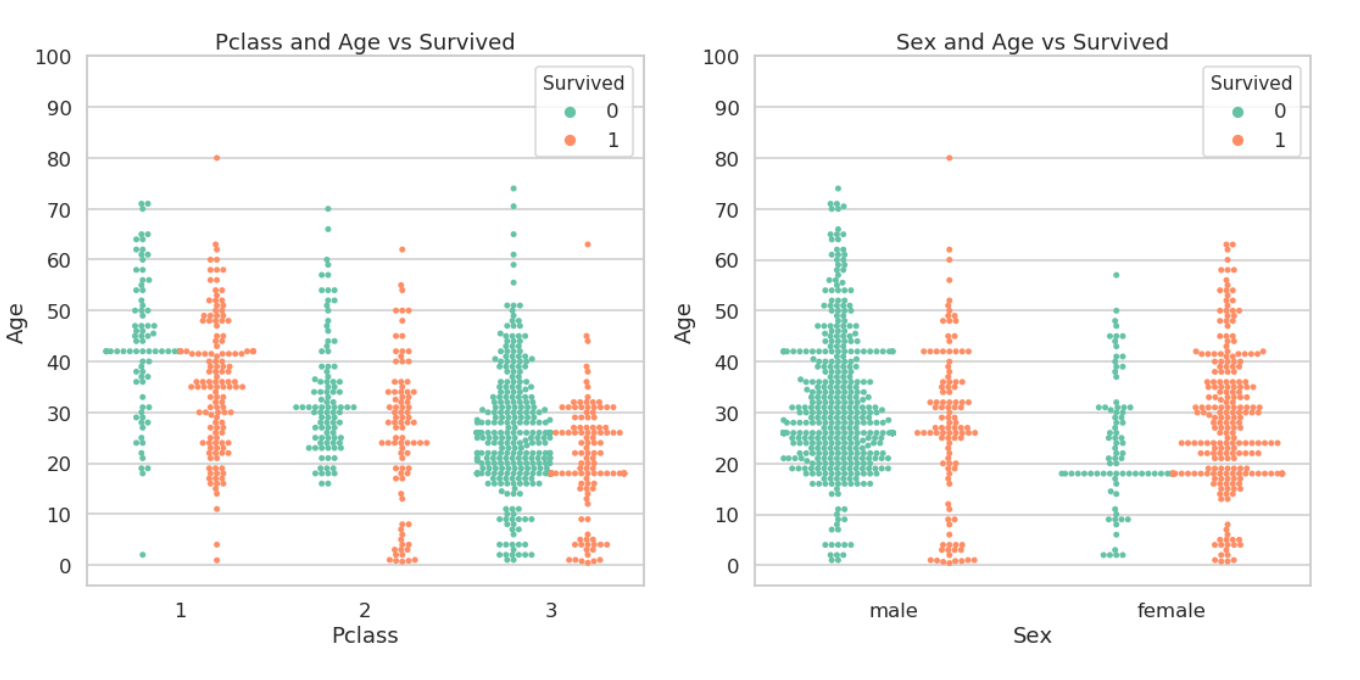![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

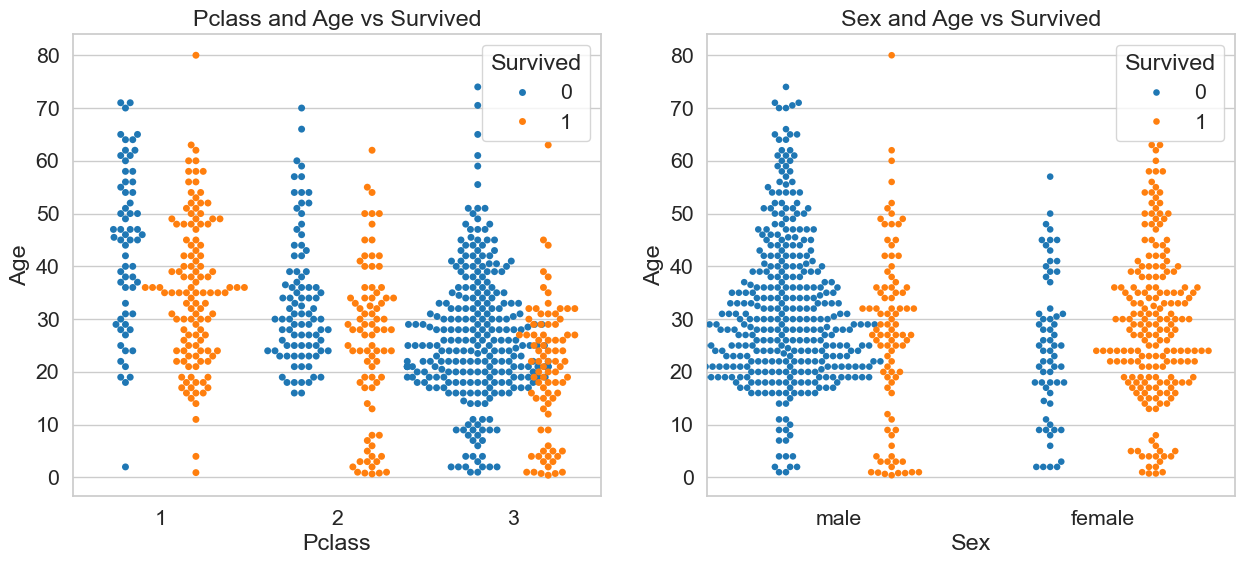

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.swarmplot(data=dataset, x='Pclass', y='Age', hue='Survived', ax=axes[0], dodge=True)
axes[0].set_title('Pclass and Age vs Survived')
sns.swarmplot(data=dataset, x='Sex',y='Age', hue='Survived',ax=axes[1],dodge=True, size=4.75)
axes[1].set_title('Sex and Age vs Survived')
plt.show()

Прокоментуйте побудовані графіки\
На даних графіках можна побачити співвідношення класу та статі до віку людей, які вижили, де 1 це вижив, та 0 загинув.\
На графіку зліва показано, в яких класах найбільше вижило та загинуло за віком. Та зрозуміти, що найбільше загинуло в 3 класі з 20 до 50 років.\
На графіку справа видно, скільки вижило та загинуло чоловіків та жінок по віку, та зрозуміти, що найбільше загинуло чоловіків.\

**Задача 8** Побудуйте наступні діаграми розподілів:  

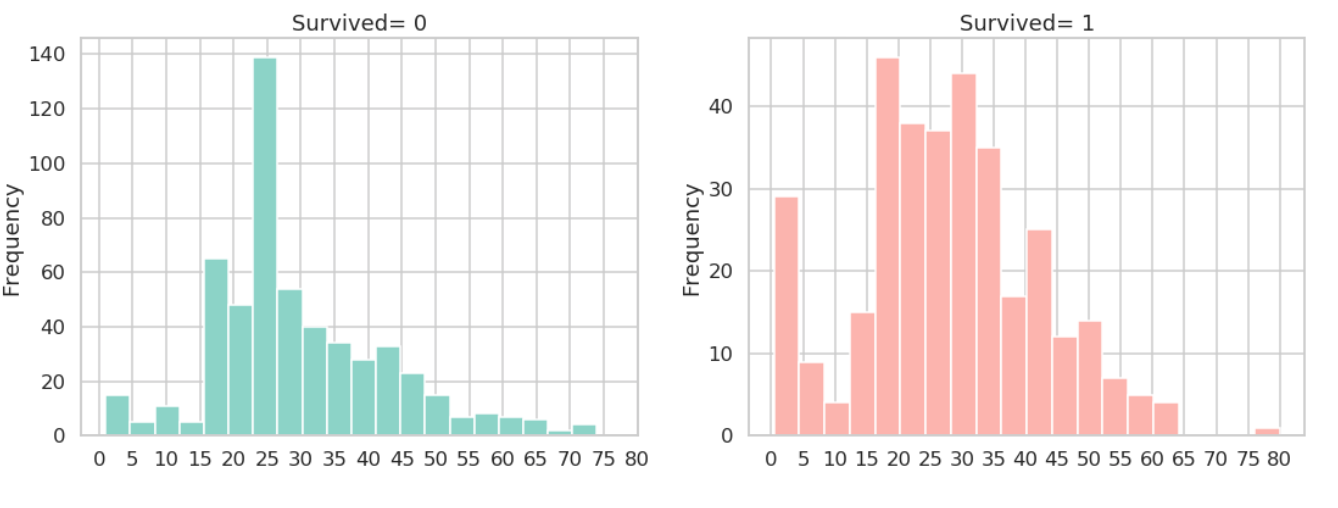



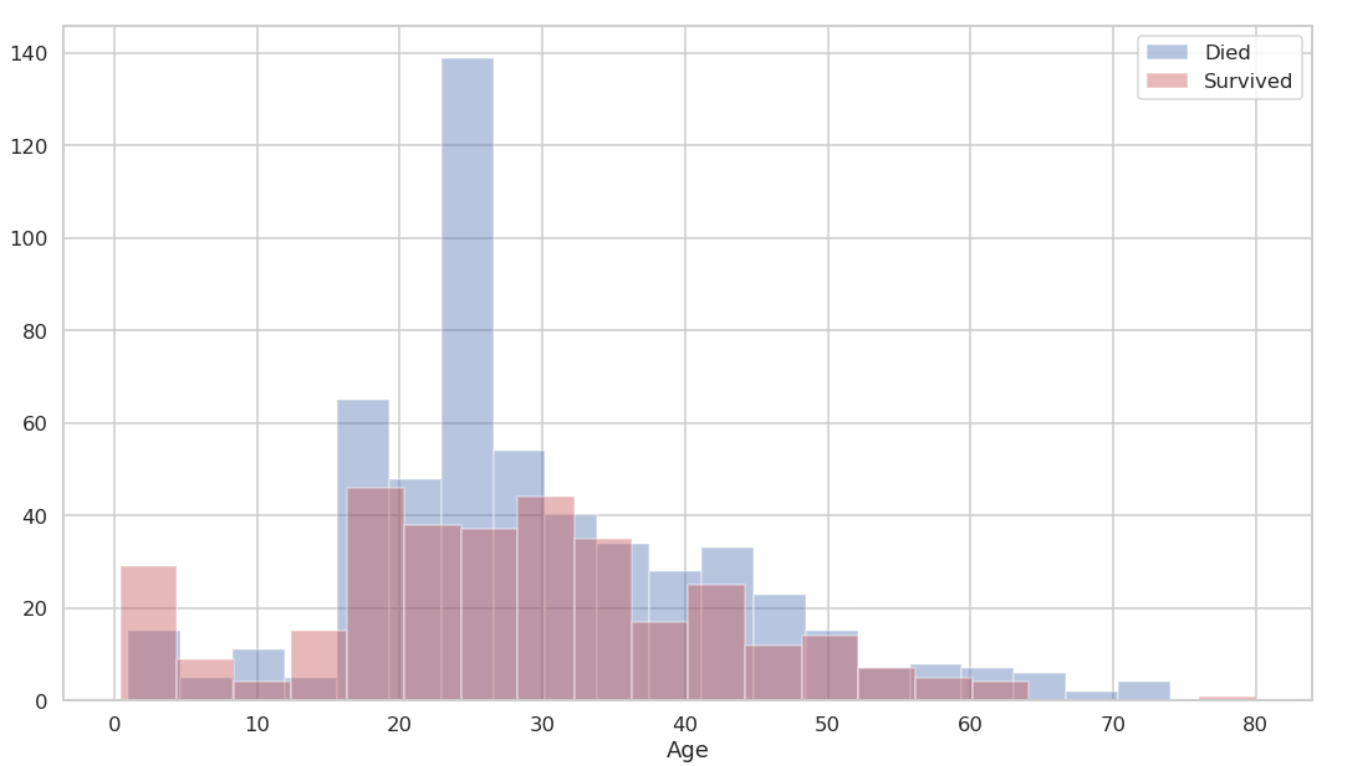

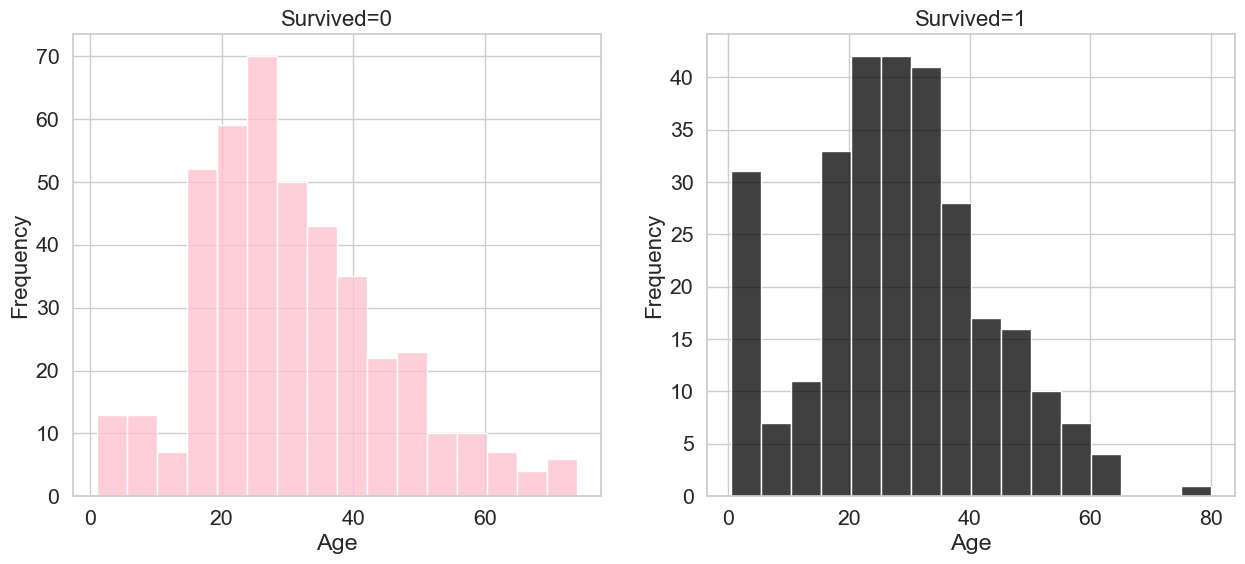

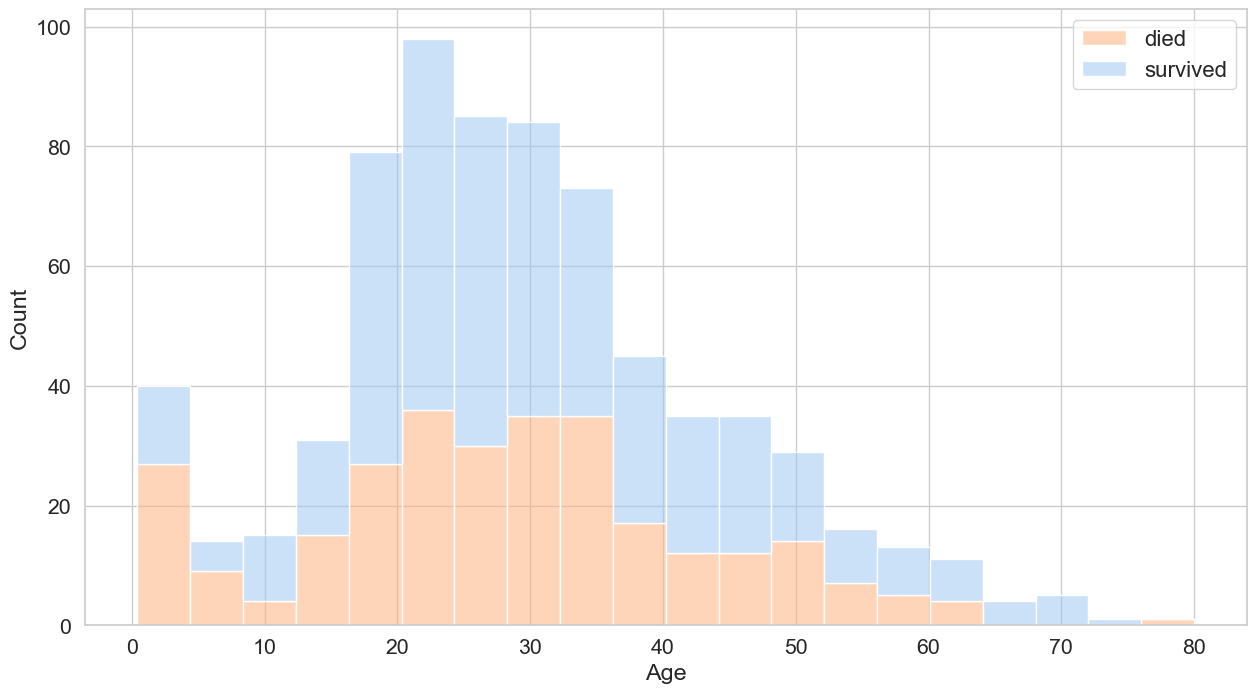

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.histplot(data=dataset[dataset['Survived'] == 0], x='Age', color='pink', ax=axes[0])
axes[0].set_title('Survived=0',fontsize=16)
axes[0].set_ylabel('Frequency', fontsize=16)

sns.histplot(data=dataset[dataset['Survived'] == 1], x='Age', color='black', ax=axes[1])
axes[1].set_title('Survived=1',fontsize=16)
axes[1].set_ylabel('Frequency', fontsize=16)

fig, axes = plt.subplots(ncols=1, figsize=(15, 8))
sns.histplot(data=dataset,x='Age',hue='Survived', palette='pastel', multiple="stack", alpha=0.55 ,ax=axes)
plt.legend(['died','survived'], fontsize=16)

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?
За даними діаграмами можна зробити висновок, що жодна з змінних не має нормального розподілу.Даних визуалізацій буде не достатньо для точних висновків та статистичних оцінок оскільки гістограми не показують звязки з іншими змінними.Для отримання більш точних висновків необхідно врахувати такі метрики, як середнє значення, мода та медіана, які надають більш повний огляд розподілу даних і дозволяють здійснити більш точні аналізи.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
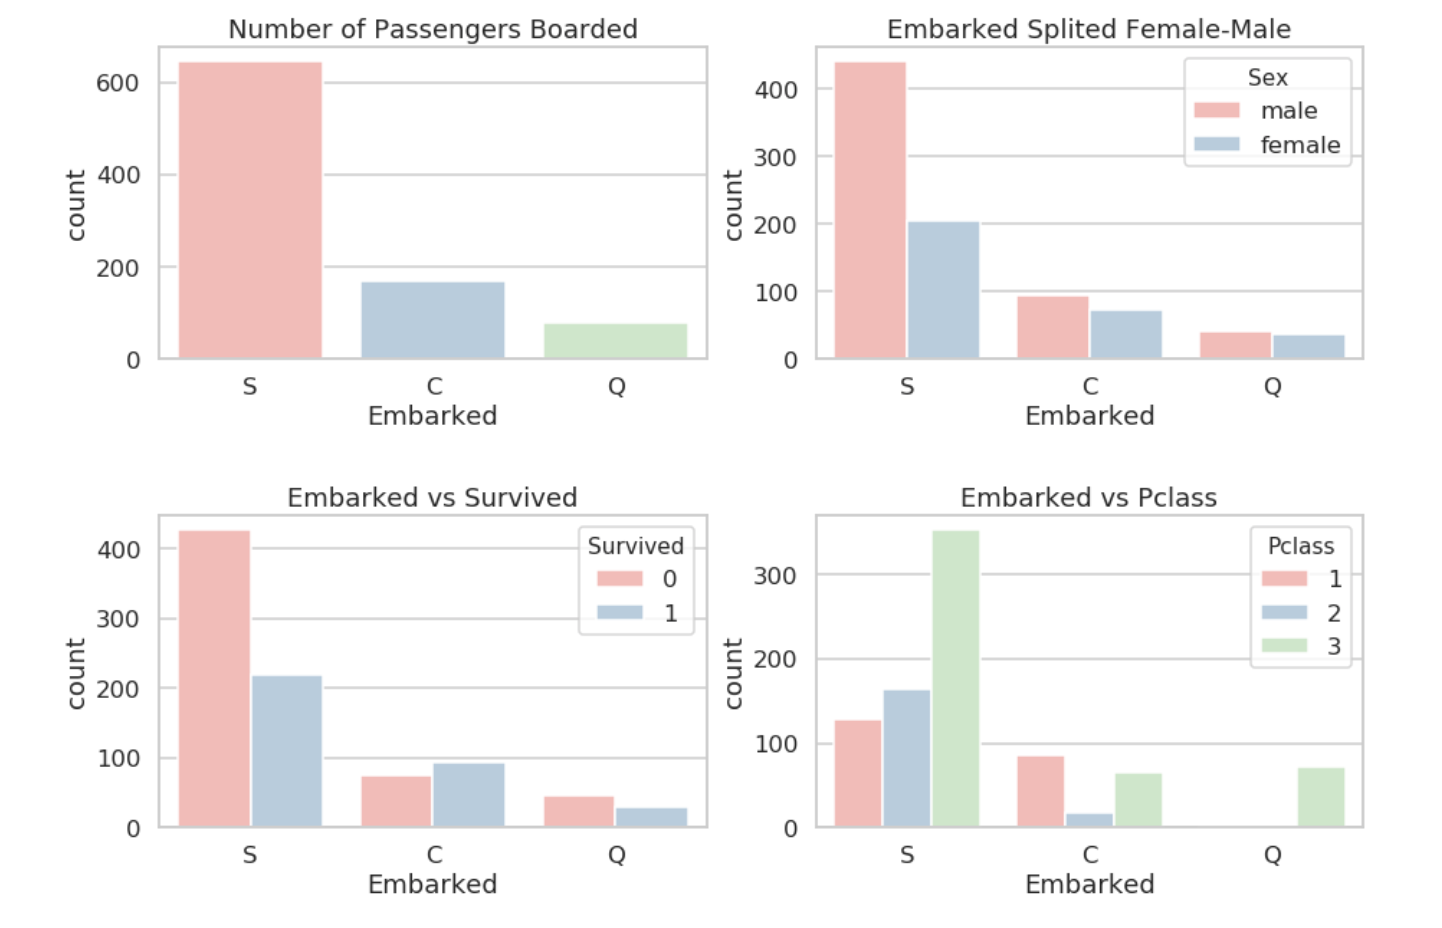

Text(0.5, 1.0, 'Embarked vs Pclass')

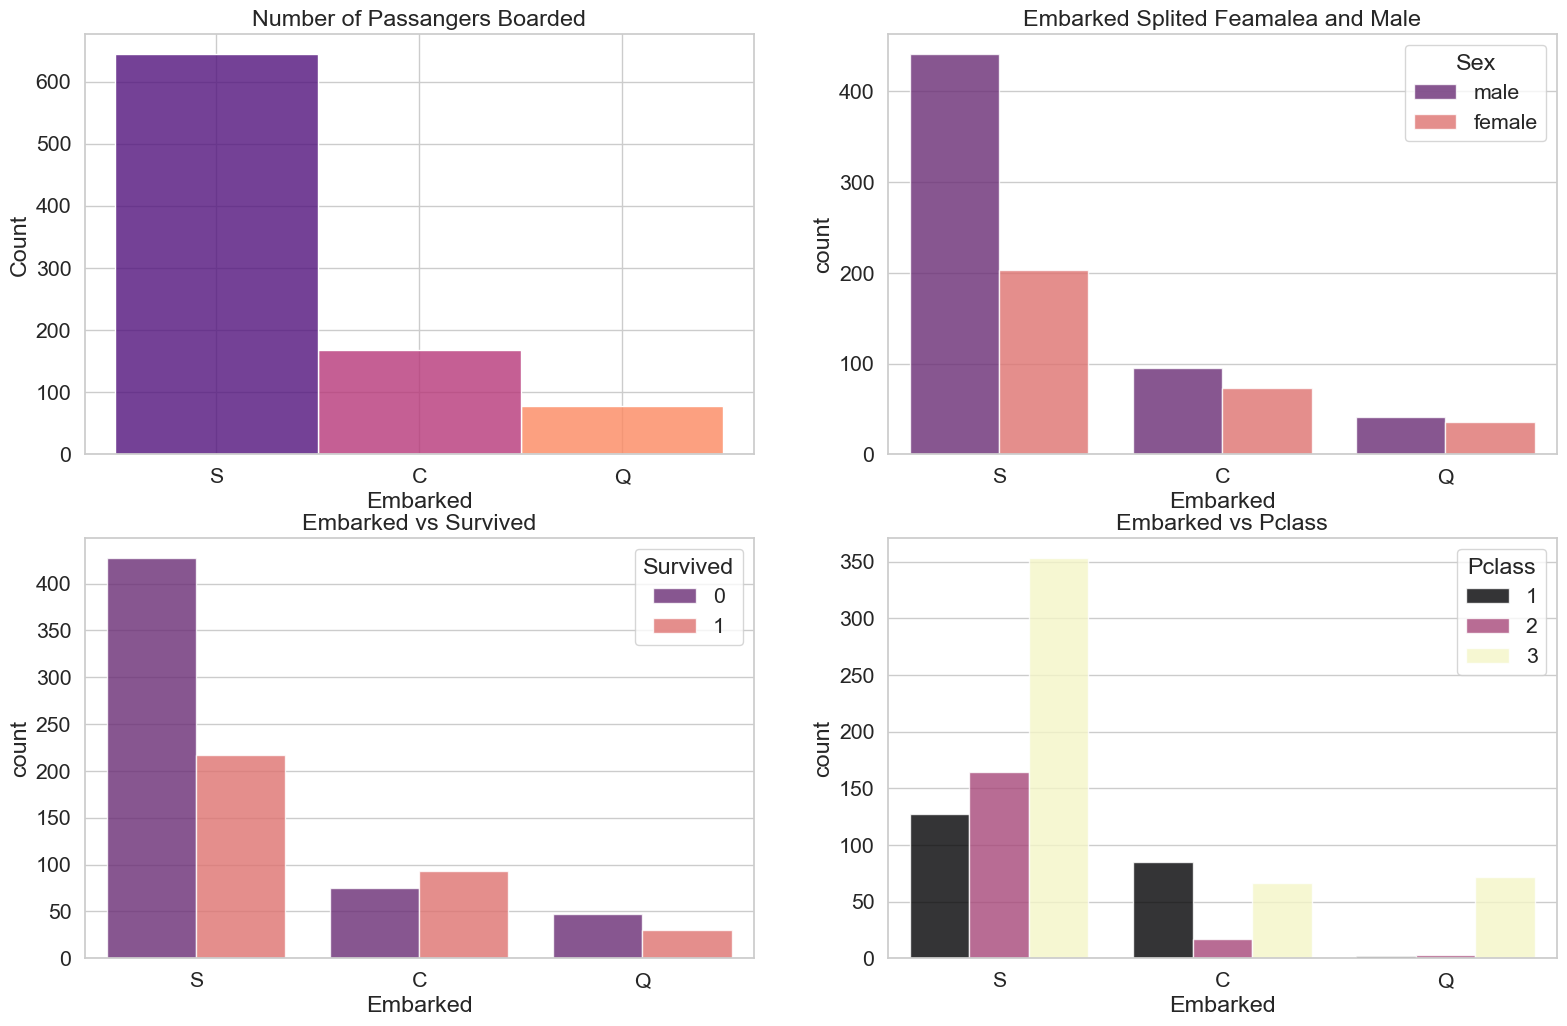

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=2 ,figsize=(19,12))

sns.histplot(data=dataset, x='Embarked', hue='Embarked', palette='magma', ax=axes[0,0], alpha=0.8, legend=False)
axes[0,0].set_title('Number of Passangers Boarded')

sns.countplot(data=dataset, x='Embarked',hue='Sex', palette='magma', ax=axes[0,1], alpha=0.8)
axes[0,1].set_title('Embarked Splited Feamalea and Male')

sns.countplot(data=dataset, x='Embarked',hue='Survived', palette='magma', ax=axes[1,0], alpha=0.8)
axes[1,0].set_title('Embarked vs Survived')

sns.countplot(data=dataset, x='Embarked',hue='Pclass', palette='magma', ax=axes[1,1], alpha=0.8)
axes[1,1].set_title('Embarked vs Pclass')

Глянувши на графіки можна зрозуміти що з більшою вірогідністю можна було вижити сівши на бароплав з S. Найнижчі шанси на виживання і чоловіків та жінок спостерігаються в борті Q. Тобто з найбільшою вірогідністю ви вижевете якщо будете жінкою з S борту  та білетом 3 класу .

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

<Axes: xlabel='Pclass', ylabel='Density'>

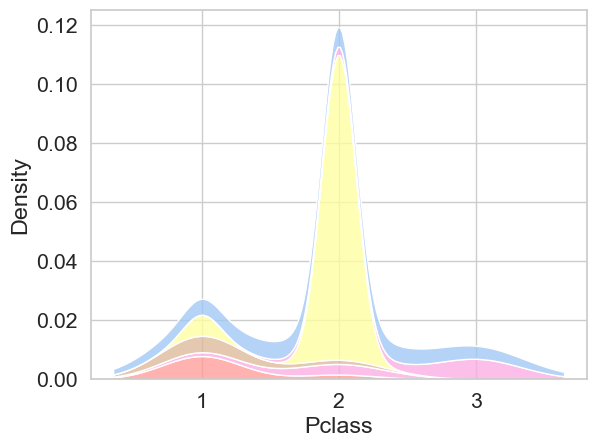

In [14]:

sns.kdeplot(data=dataset, x='Pclass', hue='Fare', palette='pastel', alpha=0.8, multiple='stack', legend=False)


Прокоментуйте побудовані графіки\
На даному графіку можна побачити що це не нормальний розподіл та тут ніби присутній хвіст з права.2 клас: Має найвищу щільність ймовірності. Це може означати, що більшість пасажирів 2 класу купили квитки за схожою ціною. 1 клас: має  широкий розподіл щільності ймовірності. Це може говорити про те, що пасажири 1 класу купували квитки за найдорожчими цінами залежно від типу каюти. 3 клас: має щільність на спад що може свідчити що тут квитки купувались за найнижчою ціною.